In [1]:
import wandb
import matplotlib.pyplot as plt

/home/dylan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Initialize WandB API
api = wandb.Api()
entity = 'dceveringham-technical-university-of-berlin'
project = 'moe-experiments'

# Fetch all runs from project
runs = api.runs(f'{entity}/{project}')

print(f'Found {len(runs)} runs')

# Collect metrics
metrics_list = []
for run in runs:
    # .summary contains the final output keys/values
    # .config contains the hyperparameters (learning rate, batch size, etc.)
    if ('arc_easy' in run.summary):
        metrics_list.append({
            'run_id': run.id,
            'name': run.name,
            'coeff_load_balancing': run.config.get('router_aux_loss_coef'),
            'arc_easy_acc': run.summary.get('arc_easy')['acc,none'],
            'hellaswag_acc': run.summary.get('hellaswag')['acc,none'],
        })

wandb: [wandb.Api()] Loaded credentials for https://api.wandb.ai from /home/dylan/.netrc.


Found 18 runs


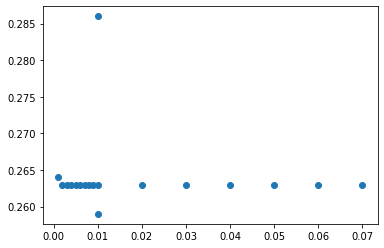

In [3]:
# Plot
coeff_load_balancing = [r['coeff_load_balancing'] for r in metrics_list]
arc_easy_acc = [r['arc_easy_acc'] for r in metrics_list]
hellaswag_acc = [r['hellaswag_acc'] for r in metrics_list]
plt.scatter(coeff_load_balancing, arc_easy_acc)
plt.show()

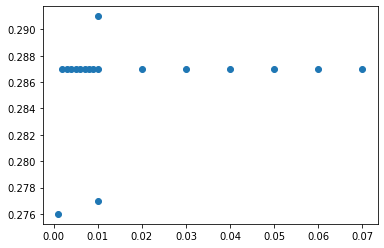

In [4]:
plt.scatter(coeff_load_balancing, hellaswag_acc)
plt.show()